In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [2]:
adata  = sc.read_h5ad('nico_out/nico_celltype_annotation.h5ad')

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

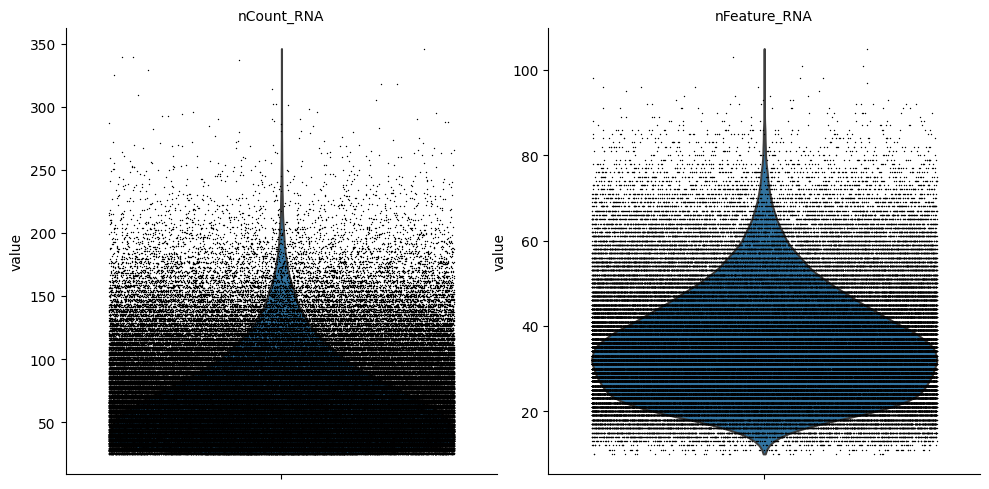

In [3]:
sc.pl.violin(adata, ['nCount_RNA', 'nFeature_RNA'], jitter=0.4, multi_panel=True)

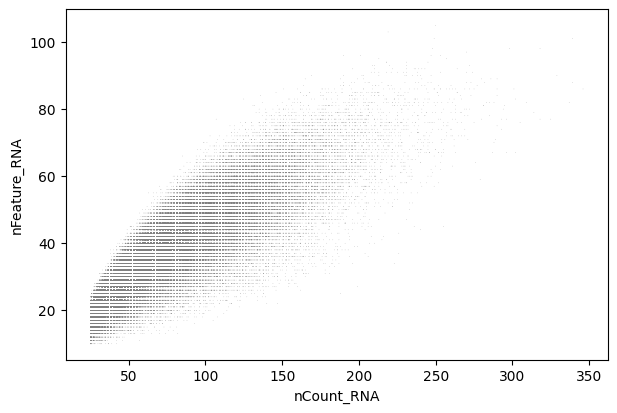

In [4]:
# Scatter plot to check correlation
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

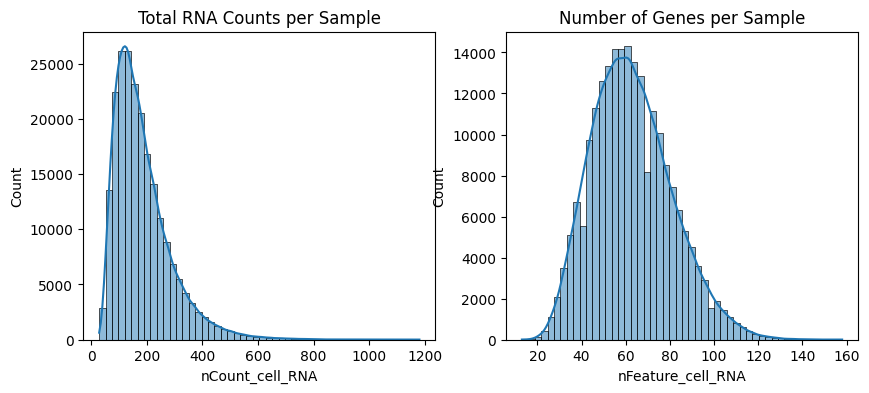

In [5]:
# Histogram to check sample-level distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(adata.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(adata.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

In [6]:
ind= np.where(adata.obs['disease_status']=='healthy')
ad_healthy= adata[ind[0],:].copy()


ind= np.where(adata.obs['disease_status']=='fibrosis')[0]
ad_fibrosis= adata[ind,:].copy()


print(ad_healthy, ad_fibrosis)

AnnData object with n_obs × n_vars = 75003 × 335
    obs: 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_cell_RNA', 'nFeature_cell_RNA', 'sample', 'patient', 'lineage', 'finest_CT1', 'fine_CT2', 'fine_CT3', 'fine_CT4', 'broad_CT5', 'broad_CT6', 'sample_name', 'disease_status', 'fibrosis', 'clinical_diagnosis', 'n_counts', 'leiden0.4', 'leiden0.5', 'nico_ct'
    var: 'n_cells'
    uns: 'leiden', 'leiden0.5_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances' AnnData object with n_obs × n_vars = 142215 × 335
    obs: 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_cell_RNA', 'nFeature_cell_RNA', 'sample', 'patient', 'lineage', 'finest_CT1', 'fine_CT2', 'fine_CT3', 'fine_CT4', 'broad_CT5', 'broad_CT6', 'sample_name', 'disease_status', 'fibrosis', 'clinical_diagnosis', 'n_counts', 'leiden0.4', 'leiden0.5', 'nico_ct'
    var: 'n_cells'
    uns: 'leiden', '

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

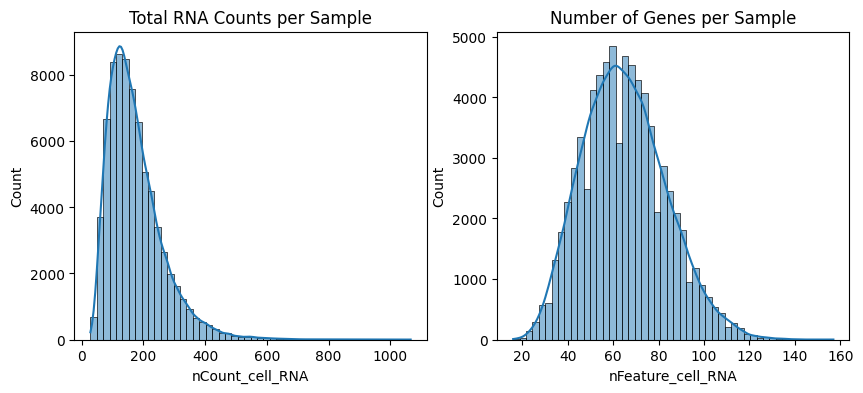

In [7]:
# Histogram to check healthy distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ad_healthy.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(ad_healthy.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/agrawal/miniconda3/envs/nicoAnkur/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

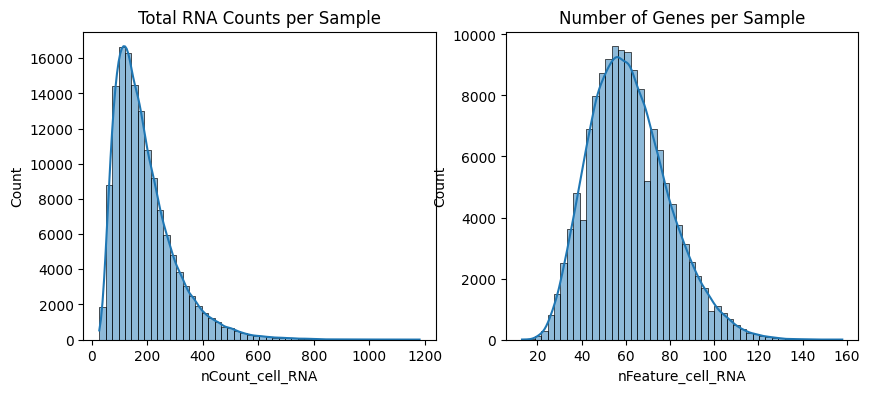

In [8]:
# Histogram to check Diseased distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ad_fibrosis.obs['nCount_cell_RNA'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Total RNA Counts per Sample")
sns.histplot(ad_fibrosis.obs['nFeature_cell_RNA'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Number of Genes per Sample")
plt.show()

In [9]:
ad_healthy.write_h5ad('healthy.h5ad')
ad_fibrosis.write_h5ad('fibrosis.h5ad')

In [10]:
all_CT =  sorted(list(np.unique(adata.obs['nico_ct'])))

In [11]:
all_CT

['AT0',
 'AT1',
 'AT2',
 'AT2 proliferating',
 'Adventitial fibroblasts',
 'Alveolar Mph CCL3+',
 'Alveolar Mph MT-positive',
 'Alveolar Mph proliferating',
 'Alveolar fibroblasts',
 'Alveolar macrophages',
 'B cells',
 'Basal resting',
 'CD4 T cells',
 'CD8 T cells',
 'Classical monocytes',
 'Club (nasal)',
 'Club (non-nasal)',
 'DC1',
 'DC2',
 'Deuterosomal',
 'EC aerocyte capillary',
 'EC arterial',
 'EC general capillary',
 'EC venous pulmonary',
 'EC venous systemic',
 'Goblet (bronchial)',
 'Goblet (nasal)',
 'Goblet (subsegmental)',
 'Hematopoietic stem cells',
 'Hillock-like',
 'Interstitial Mph perivascular',
 'Ionocyte',
 'Lymphatic EC differentiating',
 'Lymphatic EC mature',
 'Lymphatic EC proliferating',
 'Mast cells',
 'Mesothelium',
 'Migratory DCs',
 'Monocyte-derived Mph',
 'Multiciliated (nasal)',
 'Multiciliated (non-nasal)',
 'Myofibroblasts',
 'NK cells',
 'NM',
 'Neuroendocrine',
 'Non-classical monocytes',
 'Peribronchial fibroblasts',
 'Pericytes',
 'Plasma cell

In [18]:
healthy_CT = ad_healthy.obs['nico_ct'].to_numpy()
diseased_CT = ad_fibrosis.obs['nico_ct'].to_numpy()

In [13]:
# define function for count the element in objects 

def count_frequency_in_array(arr,element):
    d={}
    for i in range(len(element)):
        d[element[i]]=0

    
    for i in range(len(arr)):
        if arr[i] in d:
            d[arr[i]]+=1

    count_freq=[]
    for i in range(len(element)):
        count_freq.append(d[element[i]])

    return np.array(count_freq)

In [19]:
healthy_CT_counts= count_frequency_in_array(healthy_CT,all_CT)
print(healthy_CT_counts)

diseased_CT_counts= count_frequency_in_array(diseased_CT,all_CT)
print(diseased_CT_counts)


[   23  4093  9736   709  2738    32   145   588  1615  4622    88    63
  2205   776  7397     1    75   212   438    45  1383 10284  4136  1714
   646     2     1   676     0     0   323   233    26  1863    35   735
    31    42  1609     0  5139   152  1693   226    10  1414   301   182
   278    37   237     3  5320   105    43    66   195    38   224]
[   63  1924  5842   144  9939    41   219   244  2205  7479 10372   318
 14305  5590  2809     0    61   456  1871   100   601  4855  1354  3133
  6509     0     4  4140     4    11   869  1594    29  2781    19  2709
   211   954  4834     1 11269   274   946   536    18  1570  5370   288
  9378   156   597     1 10011   146   317   207   766     7  1764]


In [20]:

healthy_CT_counts=healthy_CT_counts/np.sum(healthy_CT_counts)
diseased_CT_counts=diseased_CT_counts/np.sum(diseased_CT_counts)

In [21]:
ratio={}
myxlabel=['healthy','fibrosis']
for i in range(len(all_CT)):
    #if CTname[i,1]!='NM':
    #k1=np.where(IZ==CTname[i,1])
    #k2=np.where(BZ==CTname[i,1])
    total=healthy_CT_counts[i]+diseased_CT_counts[i]
    #propIZ.append(x1)
    #propBZ.append(x2)
    #name=CTname[i,1].replace('_',' ')
    ratio[all_CT[i]]=[healthy_CT_counts[i]/total,diseased_CT_counts[i]/total]


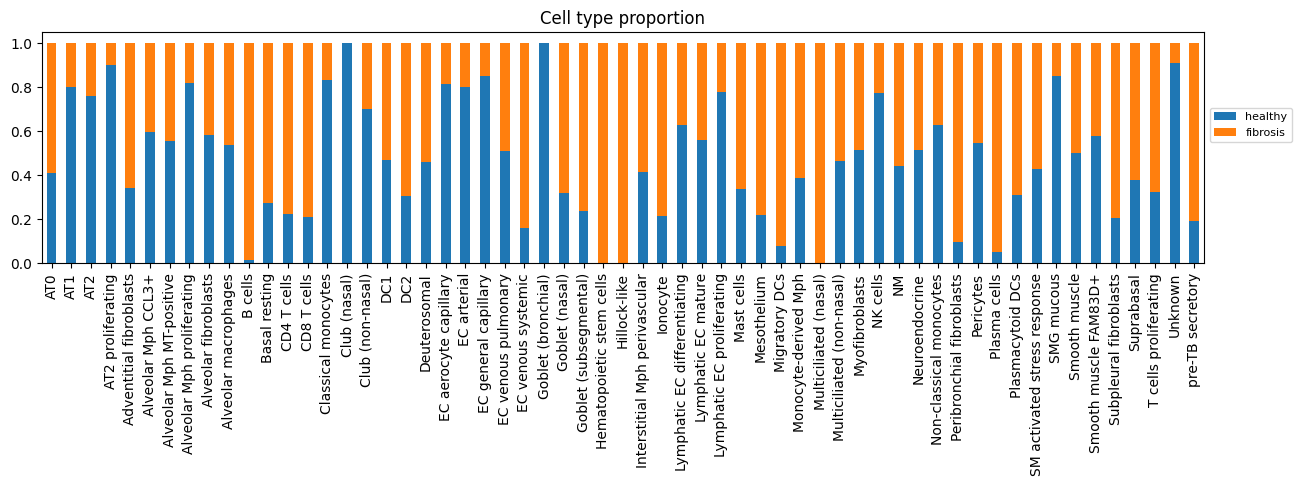

In [22]:
fig, (ax2) = plt.subplots(1,1, figsize=(15, 3))
#ratio={'IZ':propIZ,'BZ':propBZ}
#ratio={'f':comb}
df=pd.DataFrame(ratio,index=myxlabel)
df.T.plot(ax=ax2,kind='bar',stacked=True,rot=90)
ax2.set_title('Cell type proportion')
ax2.legend(loc='lower left',fontsize=8, bbox_to_anchor=(1.0,0.5))  # 0.7 1
#fig.tight_layout()
#fig.savefig('celltyp_prop.pdf',bbox_inches='tight',transparent=True,dpi=300)
